## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

## Descriptors dataset Load

The first step in this data treatment is to load the descriptor dataset that was calculated previously

In [2]:
descriptors = pd.read_csv('descriptors_molecule.csv', index_col = [0])

In [3]:
descriptors.shape

(282, 2048)

Features will be removed from the descriptors dataset to improve modeling performance and reduce bias

## High Colinearity removal

In [4]:
import HColinearity_LVariance as hclv

### Correlation matrix

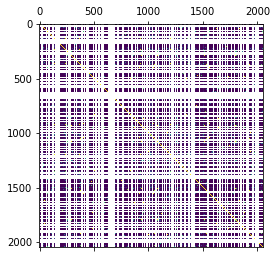

In [5]:
hclv.correlation_matrix(descriptors)

Columns with high collinearity will be removed, defined as the ones with correlation values greater then an threshold of 0.7

In [6]:
descriptors = hclv.high_col_removal(descriptors, 0.7)

In [7]:
descriptors.shape

(282, 1292)

## Low Variance Removal

Low Variance Removal is also a commonly used feature selection technique. It verifies if a feature will give impactfull information for the model. 

In [8]:
descriptors = hclv.remove_low_variance(descriptors)

In [9]:
descriptors.shape

(282, 18)

And you can see which columns were kept

In [10]:
descriptors.columns

Index(['80', '294', '314', '378', '389', '675', '689', '875', '926', '935',
       '1057', '1088', '1152', '1199', '1385', '1504', '1722', '1816'],
      dtype='object')

### Correlation Matrix after cleaning

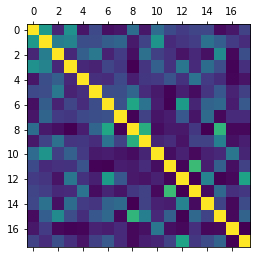

In [11]:
hclv.correlation_matrix(descriptors)

In [12]:
descriptors.to_csv('molecule_descriptors_lvhc.csv')